# Homework 6
Suggested solutions.

In [1]:
using Plots, LaTeXStrings

## Exercise 5.17

In [2]:
# Tridiagonal solver. Solves
#   tridiag(a,b,c) x = d
# where tridaig(a,b,c) is the tridiagonal matrix defined by
#   a  sub-diagonal
#   b      diagonal
#   c  sup-diagonal
# WARNING: this modifies the elements of b.
function tridisolve(a,b,c,d)
    x = copy(d)
    n = length(x)

    # Elimination
    for j = 1:n-1
        μ = a[j]/b[j]
        b[j+1] = b[j+1] - μ*c[j]
        x[j+1] = x[j+1] - μ*x[j]
    end
    
    # Backsolve
    x[n] = x[n]/b[n]
    for j = n-1:-1:1
        x[j] = ( x[j]-c[j]*x[j+1] ) / b[j]
    end
    return x
end;

Here's some test data for this solver.

In [3]:
n = 10

# The vectors that define a matrix
md = [ float(3i) for i=1:n]
ld = [-float( i) for i=1:n-1]
ud = copy(ld)

# Random RHS
b = randn(n)

# An explicit dense version of the tridiagonal matrix.
A = diagm(ld,-1) + diagm(md) + diagm(ud,1);

Now solve using the custom tridiagonal solver and the built-in backslash operator and compare the solutions. The norm of the difference should be small.

In [4]:
x1 = A\b
x2 = tridisolve(ld,md,ud,b)
norm(x1-x2)

2.110382192020081e-17

## Exercise 5.18

In [5]:
n = 100  # number of unknowns
h = 1/n  # mesh size
u = [ sin(π/2*h*i) for i in 1:n ] # exact solution for differential problem

# Form the tridiagonal system
md = 2ones(n)     # main diag
ud = -ones(n-1)    # upper diag
ld = copy(ud)     # lower diag
ld[n-1] = -2      # adjust ld for boundary condition v'(1)=0
g = h^2*(π/2)^2*u # RHS vector (scaling by h^2 is done here only once)
;

In [6]:
# Solve and compare to the true solution.
v = tridisolve(ld,md,ud,g)
@printf "||v-u||_inf = %10.2e\n" norm(v-u,Inf)

||v-u||_inf =   2.06e-05


This is an acceptably small error.

## Exercise 6 (part b)

Here is a function to solve the regularized LS problem
$$
\min_x\ \|Ax-b\|^2 + \lambda\|x\|^2.
$$

In [7]:
function rls(A,b,λ)
    n = size(A,2)
    Â = [ A
         √λ*eye(n)]
    b̂ = [b; zeros(n)]
    Q, R = qr(Â)
    return R \ (Q'*b̂)
end;

In [8]:
# Generate data
m = 100
n =  10
A = randn(m,n)
b = randn(m);

In [9]:
xNrm = []
rNrm = []
for λ in linspace(0,1,50)
    x = rls(A,b,λ)
    r = b - A*x
    push!(xNrm, norm(x))
    push!(rNrm, norm(r))
end;


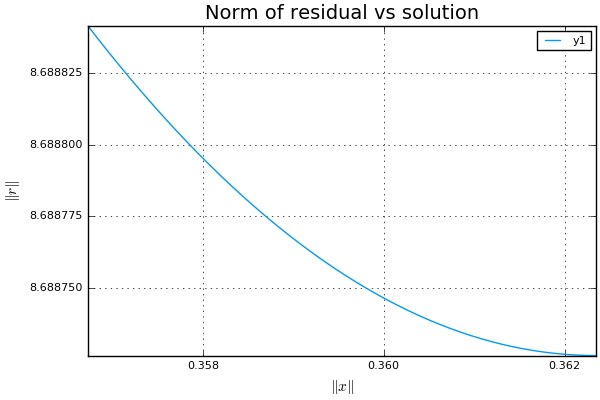

In [10]:
plot(xNrm,rNrm,xlabel=L"\|x\|", ylabel=L"\|r\|",title="Norm of residual vs solution")


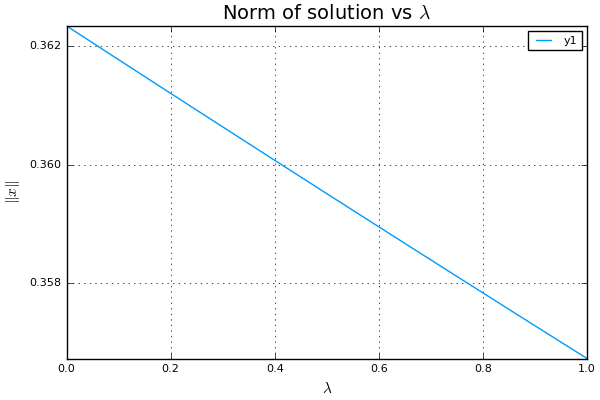

In [12]:
plot(linspace(0,1,50),xNrm,xlab=L"\lambda",ylab=L"\|x\|",title=L"Norm of solution vs $\lambda$")